In [188]:
import glob
import pandas as pd
import rasterio
from rasterio.mask import mask
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import gdal, ogr, osr, os

In [189]:
def array2raster(rasterfn,newRasterfn,array):
    raster = gdal.Open(rasterfn)
    geotransform = raster.GetGeoTransform()
    originX = geotransform[0]
    originY = geotransform[3]
    pixelWidth = geotransform[1]
    pixelHeight = geotransform[5]
    cols = raster.RasterXSize
    rows = raster.RasterYSize
    driver = gdal.GetDriverByName("GTiff")
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Float32)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromWkt(raster.GetProjectionRef())
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

In [190]:
date = "20141018"
blue_band  = glob.glob('/vault/projects/sustainable-agriculture/Landsat8_Images/*'+date+'*band2*tif')
green_band = glob.glob('/vault/projects/sustainable-agriculture/Landsat8_Images/*'+date+'*band3*tif')
red_band   = glob.glob('/vault/projects/sustainable-agriculture/Landsat8_Images/*'+date+'*band4*tif')
nir_band   = glob.glob('/vault/projects/sustainable-agriculture/Landsat8_Images/*'+date+'*band5*tif')
swir_band   = glob.glob('/vault/projects/sustainable-agriculture/Landsat8_Images/*'+date+'*band6*tif')

Img_QA_files = glob.glob('/vault/projects/sustainable-agriculture/Landsat8_Images/*175083_'+date+'*pixel_qa*')

img_blue  = rasterio.open(blue_band[0])
img_green = rasterio.open(green_band[0])
img_red   = rasterio.open(red_band[0])
img_nir   = rasterio.open(nir_band[0])
img_swir   = rasterio.open(swir_band[0])

red   = img_red.read(1)*0.0001
green = img_green.read(1)*0.0001
blue  = img_blue.read(1)*0.0001
nir   = img_nir.read(1)*0.0001
swir  = img_swir.read(1)*0.0001

# Filter cloud - preprocess

In [191]:
qa_file      = rasterio.open(Img_QA_files[0]) # Open the QA file
qa_array     = qa_file.read(1) # Read the QA image as array

qflag        = [322, 386, 834, 898, 1346, 324, 388, 836, 900, 1348] # QA array numbers that indicate clear pixels
clear_flags  = np.isin(qa_array, qflag ) # Remove all non clear pixel flags and keep clear pixels
red_masked   = np.ma.array(red,mask=clear_flags-1) # Mask red band array
nir_masked   = np.ma.array(nir, mask=clear_flags-1) # Mask nir band array
blue_masked  = np.ma.array(blue, mask=clear_flags-1) # Mask nir band array
green_masked = np.ma.array(green, mask=clear_flags-1) # Mask nir band array
swir_masked = np.ma.array(swir, mask=clear_flags-1) # Mask nir band array


# Mask the image with values <0 and >1 to nan

In [192]:
mask_red   = np.where((red_masked.filled(np.nan)<1) & (red_masked.filled(np.nan)>0),red_masked.filled(np.nan), np.nan)
mask_blue  = np.where((blue_masked.filled(np.nan)<1) & (blue_masked.filled(np.nan)>0),blue_masked.filled(np.nan), np.nan)
mask_green = np.where((green_masked.filled(np.nan)<1) & (green_masked.filled(np.nan)>0),green_masked.filled(np.nan), np.nan)
mask_nir   = np.where((nir_masked.filled(np.nan)<1) & (nir_masked.filled(np.nan)>0),nir_masked.filled(np.nan), np.nan)
mask_swir   = np.where((swir_masked.filled(np.nan)<1) & (swir_masked.filled(np.nan)>0),swir_masked.filled(np.nan), np.nan)

array2raster(blue_band[0],"/vault/users/dara104/CleanedImage/red_"+date+".tif",mask_red)
array2raster(blue_band[0],"/vault/users/dara104/CleanedImage/green_"+date+".tif",mask_blue)
array2raster(blue_band[0],"/vault/users/dara104/CleanedImage/blue_"+date+".tif",mask_green)
array2raster(blue_band[0],"/vault/users/dara104/CleanedImage/nir_"+date+".tif",mask_nir)
array2raster(blue_band[0],"/vault/users/dara104/CleanedImage/swir_"+date+".tif",mask_swir)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in le

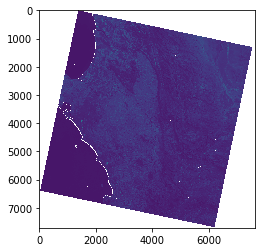

In [193]:
plt.imshow(red_masked)

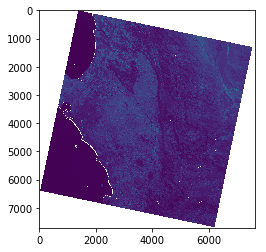

In [194]:
plt.imshow(mask_red)

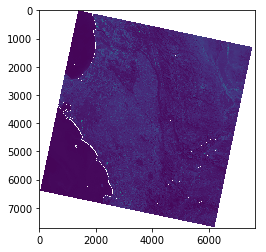

In [195]:
plt.imshow(mask_green)

In [196]:
swir_masked.filled(np.nan)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])